# YELP dataset
From the [website](https://www.yelp.com/dataset)

> The Yelp dataset is a subset of our businesses, reviews, and user data for use in connection with academic research. Available as JSON files, use it to teach students about databases, to learn NLP, or for sample production data while you learn how to make mobile apps.

Provides about **7.000.000 reviews** on **150.000 business activitites** in **11 metropolitan areas** mainly across the USA.

We are going to use a subset of those data stored locally (not available on GitHub). The full dataset can be downloaded [here](https://www.yelp.com/dataset).

In [13]:
import pandas as pd 
import yelp.loader as ld 

In [2]:
yelp = ld.load_sample()

In [3]:
yelp[0]

{'content': "Red, white and bleu salad was super yum and a great addition to the menu! This location was clean with great service and food served at just the right temps! Kids pizza is always a hit too with lots of great side dish options for the kiddos! When I'm on this side of town, this will definitely be a spot I'll hit up again!",
 'date': '2014-02-17',
 'stars': 4,
 'useful': 1,
 'funny': 0,
 'cool': 0,
 'business': 'Ue6-WhXvI-_1xUIuapl0zQ',
 'id': '----X0BIDP9tA49U3RvdSQ',
 'categories': ['American (Traditional)', 'Burgers', 'Restaurants']}

## Distribution of stars

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")

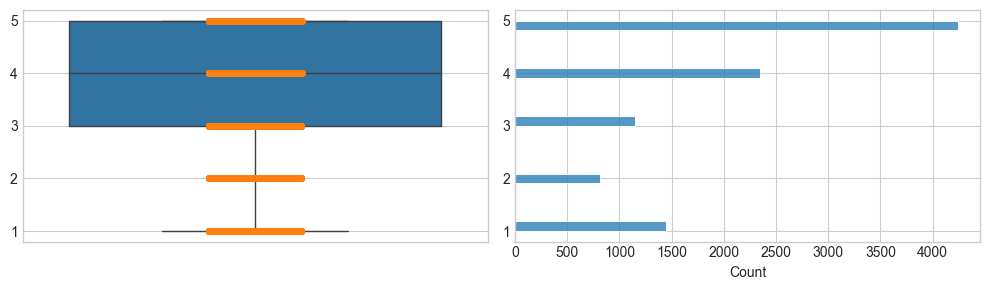

In [5]:
stars = [y for x, y in ld.stars(yelp)]
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
sns.boxplot(y=stars, ax=ax[0])
sns.stripplot(y=stars, ax=ax[0])
sns.histplot(y=stars, ax=ax[1])
plt.tight_layout()
plt.show()

## Category overview

In [6]:
from collections import defaultdict, Counter

In [10]:
categories = [y for _, y in ld.categories(yelp, flat=True)]
C = pd.Series(dict(Counter(categories).most_common()))

In [11]:
print(C.shape)
C.sort_values(ascending=False).head()

(883,)


Restaurants               6192
Food                      1898
Nightlife                 1700
Bars                      1574
American (Traditional)    1053
dtype: int64

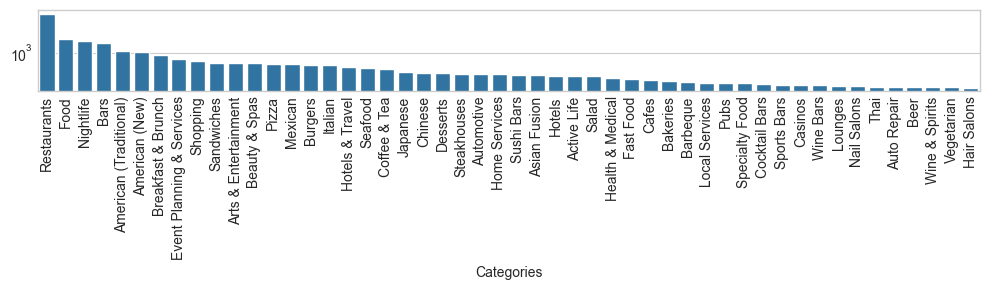

In [12]:
cats = C.head(50)
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(x=cats.index, y=cats.values, ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')
ax.set_xlabel('Categories')
plt.tight_layout()
plt.show()